In [6]:
import io
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import glob
import pandas as pd

In [4]:
# Create a Tkinter root object
root = tk.Tk()
root.withdraw()  # Hide the root window

# Launch a folder dialog box and store the selected folder path in a variable
folder_path = filedialog.askdirectory()

# Print the selected folder path
print(folder_path)

2023-05-10 13:50:19.923 python[56148:3151200] +[CATransaction synchronize] called within transaction
2023-05-10 13:50:20.241 python[56148:3151200] +[CATransaction synchronize] called within transaction
2023-05-10 13:50:29.670 python[56148:3151200] +[CATransaction synchronize] called within transaction
2023-05-10 13:51:23.262 python[56148:3151200] +[CATransaction synchronize] called within transaction


/Volumes/home/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/N2Vprocessed/EpispeedAnalysis_03042023


In [5]:
filelist=glob.glob(folder_path+"/Bin*.tif")
print(filelist)

['/Volumes/home/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/N2Vprocessed/EpispeedAnalysis_03042023/BinKymograph_19012023_Pos001_tgUtrmcherry.tif', '/Volumes/home/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/N2Vprocessed/EpispeedAnalysis_03042023/BinKymograph_19012023_Pos002_tgUtrmcherry.tif', '/Volumes/home/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/N2Vprocessed/EpispeedAnalysis_03042023/BinKymograph_19012023_Pos003_tgUtrmcherry.tif', '/Volumes/home/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/N2Vprocessed/EpispeedAnalysis_03042023/BinKymograph_19012023_Pos004_tgUtrmcherry.tif']


In [28]:
myptonecell={}
myptonecell["timeframe(hpe)"]=[ x*0.24+4 for x in list(range(35))]
for iterer in range(len(filelist)):
    img=tifffile.imread(filelist[iterer])
    mean_intensities = np.mean(img[:35], axis=(1,2))
    myptonecell[iterer]=mean_intensities/mean_intensities[0]
    norm_mean=mean_intensities/mean_intensities[0]


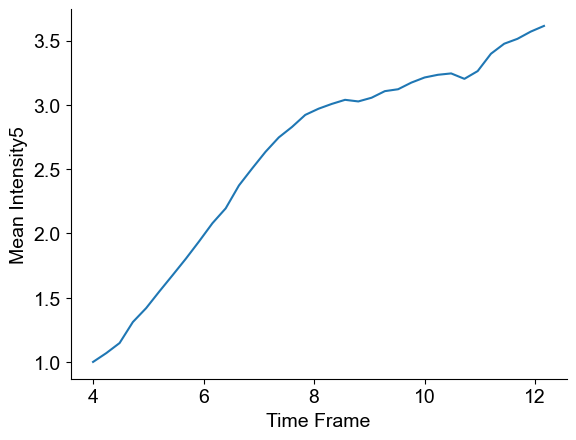

In [29]:
    # Plot a graph of mean intensity vs. time frame
    plt.plot(myptonecell["timeframe(hpe)"],norm_mean)
    plt.xlabel('Time Frame')
    plt.ylabel('Mean Intensity'+str(iterer))
    plt.show()

TimeoutError: [Errno 60] Operation timed out: '/Volumes/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/15022023/IntensityMeasurement/MyptKrt18Intensity_pos456.svg'

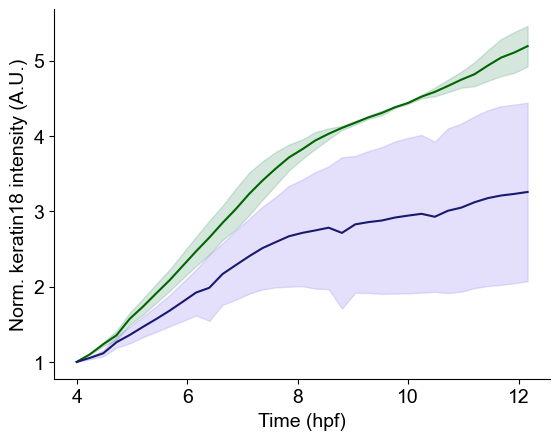

In [18]:
import matplotlib as mpl
# Define the rcParams dictionary
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True
# Set plot parameters
plt.rcParams["figure.facecolor"] = "none"
plt.rcParams["figure.frameon"] = False
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"]=14

#making averages of the columns #1&2 control #3-6 Mypt 
myptonecell=pd.DataFrame(myptonecell)
meanCIntensity=myptonecell[[1, 2]].mean(axis=1)
controlerror=myptonecell[[1,2]].std(axis=1)
meanMOnIntensity=myptonecell[[3,4,5]].mean(axis=1)
myptonecellerror=myptonecell[[3,4,5]].std(axis=1)

#plotting the graphs
plt.xlabel('Time (hpf)')
plt.ylabel('Norm. keratin18 intensity (A.U.)')
plt.plot(myptonecell["timeframe(hpe)"],meanCIntensity,
         color='darkgreen')
plt.fill_between(myptonecell["timeframe(hpe)"],meanCIntensity+controlerror,meanCIntensity-controlerror,
                 color="seagreen",alpha=0.2)
plt.plot(myptonecell["timeframe(hpe)"],meanMOnIntensity,color="midnightblue")
plt.fill_between(myptonecell["timeframe(hpe)"],meanMOnIntensity+myptonecellerror,meanMOnIntensity-myptonecellerror,
                 color="mediumslateblue",alpha=0.2)
plt.savefig(folder_path+"/MyptKrt18Intensity_pos456.svg", dpi=300, format="svg")
plt.savefig(folder_path+"/MyptKrt18Intensity_pos456.pdf", dpi=300, format="pdf")


/Volumes/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/15022023/IntensityMeasurement/SUM_FullStack_TgKrt18GFP_K4K8MO_Onecellinj_Pos001.tif


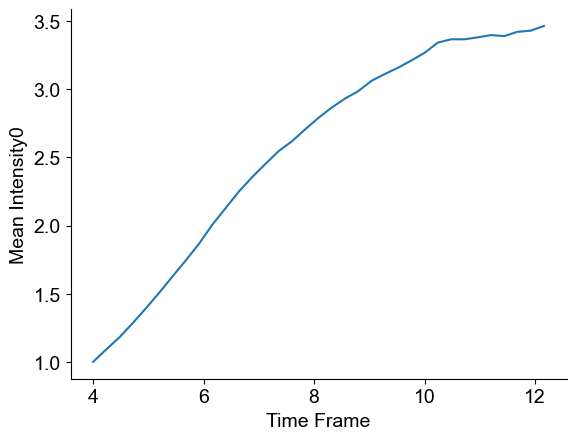

/Volumes/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/15022023/IntensityMeasurement/SUM_FullStack_TgKrt18GFP_K4K8MO_Onecellinj_Pos002.tif


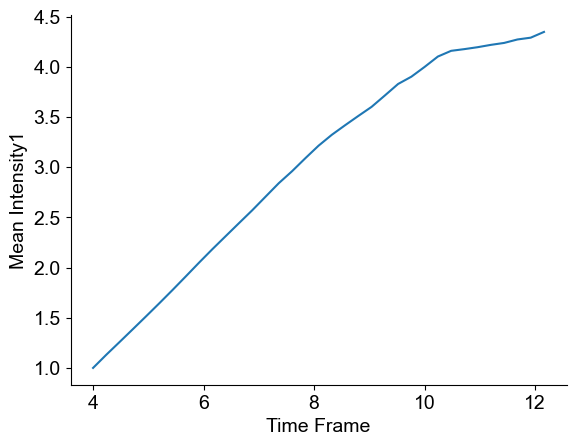

/Volumes/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/15022023/IntensityMeasurement/SUM_FullStack_TgKrt18GFP_K4K8MO_Onecellinj_Pos003.tif


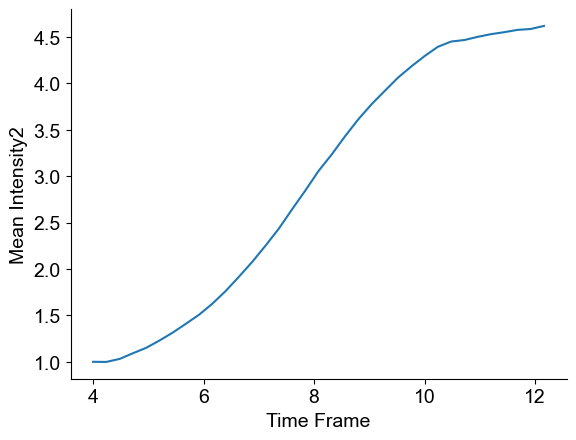

/Volumes/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/15022023/IntensityMeasurement/SUM_FullStack_TgKrt18GFP_K4K8MO_Onecellinj_Pos004.tif


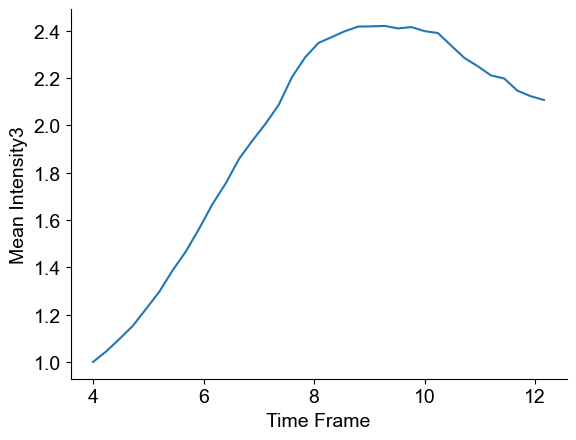

/Volumes/snaik/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/02_Feb/15022023/IntensityMeasurement/SUM_FullStack_TgKrt18GFP_K4K8MO_Onecellinj_Pos005.tif


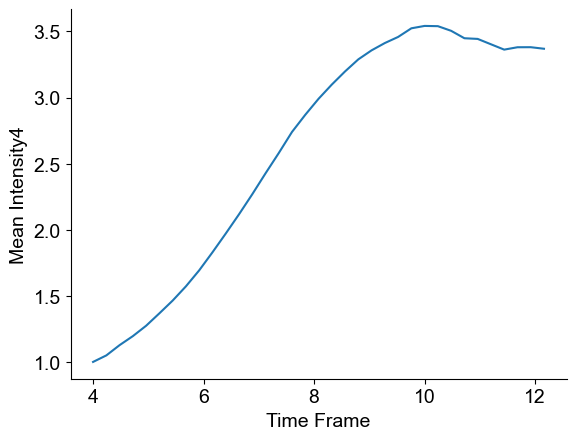

In [23]:
filelist2=glob.glob(folder_path+"/*.tif")
myptyslInj={}
myptyslInj["timeframe(hpe)"]=[ x*0.24+4 for x in list(range(35))]
for iterer in range(len(filelist2)):
    print(filelist2[iterer])
    img=tifffile.imread(filelist2[iterer])
    mean_intensities = np.mean(img[:35], axis=(1,2))
    myptyslInj[iterer]=mean_intensities/mean_intensities[0]
    norm_mean=mean_intensities/mean_intensities[0]
    # Plot a graph of mean intensity vs. time frame
    plt.plot(myptonecell["timeframe(hpe)"],norm_mean)
    plt.xlabel('Time Frame')
    plt.ylabel('Mean Intensity'+str(iterer))
    plt.show()
    


In [46]:
myptyslInj=pd.DataFrame(myptyslInj)
myptyslInj

,timeframe(hpe),0,1,2,3,4
0,4.00,1.000000,1.000000,1.000000,1.000000,1.000000
1,4.24,1.092255,1.131719,0.998767,1.044866,1.049289
2,4.48,1.181570,1.258475,1.031041,1.097665,1.127054
3,4.72,1.285793,1.386418,1.091945,1.152636,1.195168
4,4.96,1.395071,1.515023,1.150354,1.224638,1.273646
5,5.20,1.508852,1.645261,1.228943,1.297195,1.367594
6,5.44,1.628052,1.777963,1.313983,1.387280,1.463957
7,5.68,1.745861,1.913551,1.409992,1.467327,1.571670
8,5.92,1.868018,2.050629,1.508238,1.563727,1.692539
9,6.16,2.007679,2.184363,1.626516,1.667023,1.828846


In [33]:
myptonecell=pd.DataFrame(myptonecell)
myptonecell

,timeframe(hpe),0,1,2,3,4,5
0,4.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,4.24,1.099316,1.103886,1.040870,1.059686,1.033013,1.068812
2,4.48,1.215095,1.253227,1.151327,1.128215,1.068632,1.146973
3,4.72,1.310461,1.395843,1.243163,1.296021,1.177172,1.310217
4,4.96,1.516110,1.628734,1.426827,1.426619,1.229166,1.418208
5,5.20,1.658910,1.809865,1.603244,1.540474,1.307549,1.548561
6,5.44,1.822960,1.998743,1.796510,1.661976,1.372660,1.675095
7,5.68,1.982601,2.183609,1.999572,1.794570,1.440416,1.803256
8,5.92,2.157684,2.392858,2.204617,1.955655,1.502850,1.938470
9,6.16,2.330841,2.604647,2.402698,2.112831,1.570352,2.078842


           1         2
0   1.000000  1.000000
1   1.072378  1.065243
2   1.202277  1.144758
3   1.319503  1.239181
4   1.527780  1.332689
5   1.706555  1.437102
6   1.897627  1.545973
7   2.091590  1.661772
8   2.298738  1.779434
9   2.503673  1.905440
10  2.718775  2.038523
11  2.924671  2.179831
12  3.139412  2.323916
13  3.366997  2.478519
14  3.558410  2.637373
15  3.732152  2.801048
16  3.897964  2.967092
17  4.019054  3.135427
18  4.157391  3.279440
19  4.243441  3.424541
20  4.322321  3.562228
21  4.432169  3.688858
22  4.523166  3.817753
23  4.570531  3.946726
24  4.628413  4.042973
25  4.713129  4.147538
26  4.796850  4.249231
27  4.863042  4.305829
28  5.000703  4.322592
29  5.093805  4.349274
30  5.211800  4.375435
31  5.346636  4.395635
32  5.464465  4.425281
33  5.565219  4.439126
34  5.646291  4.484238


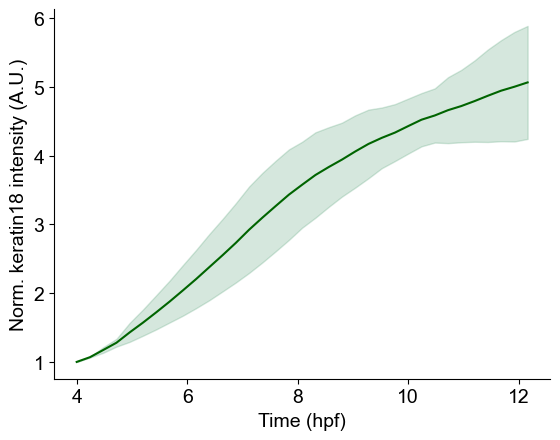

In [40]:
Control12=pd.DataFrame({1:myptonecell[[1, 2]].mean(axis=1),2:myptyslInj[[1,2]].mean(axis=1)})

meanControl12=Control12.mean(axis=1)
controlerror12=Control12.std(axis=1)
#plotting the graphs
plt.xlabel('Time (hpf)')
plt.ylabel('Norm. keratin18 intensity (A.U.)')
plt.plot([x*0.24+4 for x in list(range(35))],meanControl12,
         color='darkgreen')
plt.fill_between([x*0.24+4 for x in list(range(35))],meanControl12+controlerror12,meanControl12-controlerror12,
                 color="seagreen",alpha=0.2)
plt.savefig(folder_path+"/ControlKrt18Intensity_14_15022023.svg", dpi=300, format="svg")
plt.savefig(folder_path+"/ControlKrt18Intensity_14_15022023.pdf", dpi=300, format="pdf")

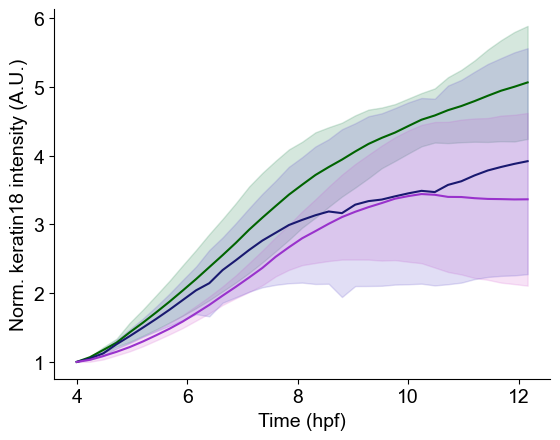

In [50]:
Control12=pd.DataFrame({1:myptonecell[[1, 2]].mean(axis=1),2:myptyslInj[[1,2]].mean(axis=1)})
meanControl12=Control12.mean(axis=1)
controlerror12=Control12.std(axis=1)
YSLmeanIntensity=myptyslInj[[2,3,4]].mean(axis=1)
YSLerror=myptyslInj[[2,3,4]].std(axis=1)
OnecellMeanIntensity=myptonecell[[2,3,4,5]].mean(axis=1)
Onecellerror=myptonecell[[2,3,4,5]].std(axis=1)

#plotting the graphs
plt.xlabel('Time (hpf)')
plt.ylabel('Norm. keratin18 intensity (A.U.)')
timing=[x*0.24+4 for x in list(range(35))]
plt.plot(timing,meanControl12,
         color='darkgreen')
plt.plot(timing,OnecellMeanIntensity,color="midnightblue")
plt.plot(timing,YSLmeanIntensity,color="darkorchid")
plt.fill_between([x*0.24+4 for x in list(range(35))],meanControl12+controlerror12,meanControl12-controlerror12,
                 color="seagreen",alpha=0.2)
plt.fill_between(timing,YSLmeanIntensity+YSLerror,YSLmeanIntensity-YSLerror,
                 color="orchid",alpha=0.2)
plt.fill_between(timing,OnecellMeanIntensity+Onecellerror,OnecellMeanIntensity-Onecellerror,
                 color="slateblue",alpha=0.2)
plt.savefig(folder_path+"/ControlKrt18Intensity_14_15022023.svg", dpi=300, format="svg")
plt.savefig(folder_path+"/ControlKrt18Intensity_14_15022023.pdf", dpi=300, format="pdf")